In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_algorithms import QAOA
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import BackendSampler
from qiskit.primitives import Sampler




import numpy as np

In [3]:
import psutil
import subprocess
import re
import time

# Función para obtener el porcentaje de uso de la CPU
def get_cpu_usage():
    return psutil.cpu_percent(interval=1)

# Función para obtener el porcentaje de uso de la GPU
def get_gpu_usage():
    result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE)
    output = result.stdout.decode('utf-8')
    match = re.search(r'(\d+)%\s+.*\s+Default', output)
    if match:
        return int(match.group(1))
    return None

In [1]:
J={(1, 1): -0.0077261858268679534, (2, 2): -0.01543653214771496, (3, 3): -0.02766225111380127, (4, 4): 0.027041900747589952, (5, 5): -0.024783931891532544, (6, 6): -0.032776824850517396, 
(7, 7): -0.0017477509906312447, (8, 8): 0.0038849529788123074, (9, 9): -0.033447510234375644, (10, 10): 0.031963930364585974, (11, 11): -0.009450890647079444, (12, 12): 0.006873429951805125, (13, 13): -0.006760674635903138, (14, 14): 0.024518960431462986, (15, 15): -0.022510265696190683, (16, 16): 0.012821068650472599, (17, 17): 0.003129703586097291, (18, 18): -0.006689277127139363, (19, 19): 0.016303918998994603, (20, 20): -0.025727692035003902, (1, 2): -0.0010037133809394682, (1, 3): -0.00025230123252330006, (1, 4): 0.0006555931077699346, (1, 5): 
0.0012061364118585956, (1, 6): 0.0003548829393708754, (1, 7): -0.0007739862705755924, (1, 8): -0.00014930435701118066, (1, 9): 0.001442037134182236, (1, 10): -0.0004274430991512345, (1, 11): 0.0014466996939570876, (1, 12): 0.0006775229097291877, (1, 13): 0.0005691167100261243, (1, 14): 0.0005626263297671157, (1, 15): 0.0009237152319027836, (1, 16): -0.0006713668211221494, (1, 17): 0.001460318034924223, (1, 18): -0.0006808024725890359, (1, 19): 0.001688861645004114, (1, 20): 6.87602881396235e-05, (2, 1): -0.001003713380939469, (2, 3): 0.0005943543817996269, (2, 4): -0.0006754713295102449, (2, 5): 0.0011895485365798078, (2, 6): 0.0005217982658698956, (2, 7): -0.00020148620552348456, (2, 8): -0.00015376202835417957, (2, 9): 0.00012682728726684544, (2, 10): -0.0016909657952812256, (2, 11): -0.00042017629957152343, (2, 12): -0.00044710295295759993, (2, 13): 0.0008450003314655933, (2, 14): 0.0004809621142714182, (2, 15): 0.0014016013237959978, (2, 16): 0.0005941009671602318, (2, 17): 0.0006902192527529896, (2, 18): 0.001562830996311113, (2, 19): -0.001353978242892407, (2, 20): 0.0017716123083687087, (3, 1): -0.00025230123252330006, (3, 2): 0.0005943543817996271, (3, 4): 8.37980206774223e-05, (3, 5): -5.349340406620197e-05, (3, 6): 0.0006655935503746258, (3, 7): 0.001158788312797756, (3, 8): -0.0013026860415184113, (3, 9): 0.0010648874052997168, (3, 10): 0.0008088806576503503, (3, 11): -0.0020763407163424544, (3, 12): -0.001364368243107661, (3, 13): -0.0006635217509025357, (3, 14): 0.0004638566261121629, (3, 15): 0.0002930538112087845, (3, 16): -0.0005865012238787584, (3, 17): -0.0003579023478402793, (3, 18): -0.0008640077773705315, (3, 19): -0.0015297967805255413, (3, 20): 0.0009852963372263158, (4, 1): 0.0006555931077699339, (4, 2): -0.0006754713295102449, (4, 3): 8.379802067742279e-05, (4, 5): 8.342463846937553e-06, (4, 6): -0.00014935153526851545, (4, 7): -0.0006852641877826644, (4, 8): -0.0003814496900509995, (4, 9): 0.0013714355460563586, (4, 10): -0.001114150941608331, (4, 11): -0.0013336794606867161, (4, 12): 0.0007614152869212811, (4, 13): -0.00034482049105654517, (4, 14): 0.000527465048550866, (4, 15): -0.0011767120067342142, (4, 16): -0.0003378839392781742, (4, 17): 0.001101841460294675, (4, 18): 0.0006810855421330434, (4, 19): 0.0008470411280828597, (4, 20): -0.0010757599716899895, (5, 1): 0.0012061364118585956, (5, 2): 0.0011895485365798078, (5, 3): -5.349340406620203e-05, (5, 4): 8.342463846937445e-06, (5, 6): 0.001533372892431491, (5, 7): -0.0007113173694329485, (5, 8): 0.0002008796279291851, (5, 9): 0.0004044551562774791, (5, 10): 0.0005738480152616626, (5, 11): 0.00028153827256855433, (5, 12): -0.0005673872899072646, (5, 13): 0.00025072278282791034, (5, 14): 0.001295345104677174, (5, 15): -0.00043987120008333476, (5, 16): -0.00021828166513454352, (5, 17): -1.2905275306283012e-05, (5, 18): 0.0004977009599736759, (5, 19): -0.0008279123666590606, (5, 20): -0.0014640168102992433, (6, 1): 0.00035488293937087573, (6, 2): 0.0005217982658698958, (6, 3): 0.0006655935503746256, (6, 4): -0.00014935153526851526, (6, 5): 0.0015333728924314914, (6, 7): -0.0010497067900397043, (6, 8): -0.000762799631786494, (6, 9): -0.0001072226994190739, (6, 10): 0.0006264706434924903, (6, 11): 0.001262428160559832, (6, 12): -0.0008592441213299646, (6, 13): -0.00019083065911695013, (6, 14): 0.0007421072481196099, (6, 15): 0.0008301796189115335, (6, 16): -0.000167013726864318, (6, 17): 0.0005206242012373741, (6, 18): 0.0002262278316198716, (6, 19): 0.0002259178030716745, (6, 20): -0.0005696788052635064, (7, 1): -0.0007739862705755927, (7, 2): -0.00020148620552348483, (7, 3): 0.001158788312797756, (7, 4): -0.0006852641877826639, (7, 5): -0.0007113173694329486, (7, 6): -0.001049706790039704, (7, 8): -0.0010585102528583097, (7, 9): -0.0003532492237168944, (7, 10): -0.0007005364636569252, (7, 11): -0.0006132472519367519, (7, 12): -0.0013486821465190674, (7, 13): 0.00014131101226851696, (7, 14): -0.0012657238988221962, (7, 15): -0.0003765418033380089, (7, 16): 0.0006357701519882145, (7, 17): -0.0006158771027955962, (7, 18): 0.0004852930782947193, (7, 19): 5.5340095853292096e-05, (7, 20): -5.410672141154316e-06, (8, 1): -0.00014930435701118088, (8, 2): -0.00015376202835417935, (8, 3): -0.0013026860415184113, (8, 4): -0.0003814496900509997, (8, 5): 0.00020087962792918516, (8, 6): -0.0007627996317864935, (8, 7): -0.00105851025285831, (8, 9): 0.0008432843908488305, (8, 10): -0.0004325639619973357, (8, 11): 0.0002201337487224712, (8, 12): 0.0012533618474503657, (8, 13): -0.0007689220216382927, (8, 14): -0.00020707211119188162, (8, 15): -0.0006352053608504101, (8, 16): 0.0008259672745066726, (8, 17): 0.00029888099996469125, (8, 18): 7.348889747474299e-05, (8, 19): -0.0014941542810844814, (8, 20): 0.0004045980389996941, (9, 1): 0.001442037134182236, (9, 
2): 0.00012682728726684544, (9, 3): 0.0010648874052997172, (9, 4): 0.0013714355460563573, (9, 5): 0.00040445515627747866, (9, 6): -0.00010722269941907466, (9, 7): -0.00035324922371689395, (9, 8): 0.0008432843908488303, (9, 10): 0.00036176422519065436, (9, 11): 0.0013803212338377462, (9, 12): -0.0001858715502959967, (9, 13): -0.0013629865941428639, (9, 14): -0.00017892825876657692, (9, 15): 0.000222178589190367, (9, 16): 0.00023056418744401197, (9, 17): 0.0026854254980320986, (9, 18): 0.0006544972242495651, (9, 19): 3.4833729315327053e-05, (9, 20): -6.017249735454789e-06, (10, 1): -0.0004274430991512349, (10, 2): -0.0016909657952812248, (10, 3): 0.0008088806576503504, (10, 4): -0.0011141509416083314, (10, 5): 0.0005738480152616628, (10, 6): 0.0006264706434924908, (10, 7): -0.0007005364636569254, (10, 8): -0.00043256396199733575, (10, 9): 0.0003617642251906551, (10, 11): -0.0013183950532605702, (10, 12): -0.001029680293776343, (10, 13): -0.000680054360222733, (10, 14): 0.0007439943784129867, (10, 15): 0.0005018769097228782, (10, 16): -0.00047246194024996315, (10, 17): 0.0004136063902501516, (10, 18): 0.0003476309672434681, (10, 19): -0.0010537465968177427, (10, 20): -0.0008207062248387789, (11, 1): 0.001446699693957088, (11, 2): -0.00042017629957152343, (11, 3): -0.002076340716342454, (11, 4): -0.0013336794606867161, (11, 5): 0.00028153827256855433, (11, 6): 0.0012624281605598314, (11, 7): -0.0006132472519367512, (11, 8): 0.00022013374872247146, (11, 9): 0.0013803212338377468, (11, 10): -0.0013183950532605702, (11, 12): 0.0002976772804275585, (11, 13): -0.00032262918675663615, (11, 14): -0.0004668612071292605, (11, 15): 0.00105029988813191, (11, 16): 0.001436754517310987, (11, 17): 0.0001147873959950999, (11, 18): 0.000877398314752253, (11, 19): 0.0004160151772746263, (11, 20): -0.0008889893386042198, (12, 1): 0.0006775229097291868, (12, 2): -0.00044710295295760015, (12, 3): -0.0013643682431076609, (12, 4): 0.0007614152869212804, (12, 5): -0.0005673872899072648, (12, 6): -0.0008592441213299644, (12, 7): -0.0013486821465190678, (12, 8): 0.0012533618474503652, (12, 9): -0.0001858715502959966, (12, 10): -0.0010296802937763423, (12, 11): 0.00029767728042755833, (12, 13): -0.0014003895165576072, (12, 14): -9.26688810065063e-05, (12, 15): -0.0006792819847526575, (12, 16): -0.00012350593795050087, (12, 17): 0.00015178862924739153, (12, 18): -1.6404554050287705e-05, (12, 19): 0.001098770829717309, (12, 20): 0.0002902756858268916, (13, 1): 0.0005691167100261245, (13, 2): 0.0008450003314655929, (13, 3): -0.0006635217509025357, (13, 4): -0.00034482049105654544, (13, 5): 0.0002507227828279102, (13, 6): -0.00019083065911695057, (13, 7): 0.0001413110122685178, (13, 8): -0.0007689220216382929, (13, 9): -0.0013629865941428643, (13, 10): -0.0006800543602227328, (13, 11): -0.0003226291867566363, (13, 12): -0.0014003895165576083, (13, 14): -0.0011867205370401596, (13, 15): 0.00037650540868235284, (13, 16): -0.0006550404481840159, (13, 17): -0.0014037876990358946, (13, 18): -0.0007454744277430795, (13, 19): -0.00021742032495063749, (13, 20): -0.0004012443388783205, (14, 1): 0.0005626263297671164, (14, 2): 0.0004809621142714182, (14, 3): 0.00046385662611216245, (14, 4): 0.0005274650485508662, (14, 5): 0.0012953451046771743, (14, 6): 0.0007421072481196095, (14, 7): -0.0012657238988221958, (14, 8): -0.00020707211119188167, (14, 9): -0.00017892825876657682, (14, 10): 0.0007439943784129865, (14, 11): -0.00046686120712926085, (14, 12): -9.266888100650607e-05, (14, 13): -0.0011867205370401594, (14, 15): -0.0009089336099048017, (14, 16): -0.0005789041764977048, (14, 17): -0.0010249476405905943, (14, 18): 0.0016678295778844226, (14, 19): -0.0006087491420874682, (14, 20): -0.00037663885575309745, (15, 1): 0.0009237152319027831, (15, 2): 0.0014016013237959969, (15, 3): 0.00029305381120878405, (15, 4): -0.0011767120067342142, (15, 5): -0.0004398712000833343, (15, 6): 0.0008301796189115328, (15, 7): -0.0003765418033380093, (15, 8): -0.0006352053608504103, (15, 9): 0.00022217858919036714, (15, 10): 0.0005018769097228781, (15, 11): 0.00105029988813191, (15, 12): -0.0006792819847526575, (15, 13): 0.00037650540868235235, (15, 14): -0.0009089336099048006, (15, 16): 0.0008991865819395057, (15, 17): -0.0005520637919250387, (15, 18): -1.3021199024303937e-06, (15, 19): -0.00040588802735023696, (15, 20): 0.00015141659498955397, (16, 1): -0.0006713668211221492, (16, 2): 0.000594100967160232, (16, 3): -0.0005865012238787584, (16, 4): -0.00033788393927817355, (16, 5): -0.0002182816651345434, (16, 6): -0.0001670137268643178, (16, 7): 0.000635770151988214, (16, 8): 0.0008259672745066722, 
(16, 9): 0.00023056418744401208, (16, 10): -0.0004724619402499628, (16, 11): 0.0014367545173109865, (16, 12): -0.00012350593795050128, (16, 13): -0.0006550404481840157, (16, 14): -0.0005789041764977043, (16, 15): 0.0008991865819395061, (16, 17): 0.00037759590040188103, (16, 18): 0.0017040853946708313, (16, 19): -0.0009882928305421576, (16, 20): -6.767788412135177e-05, (17, 1): 0.0014603180349242227, (17, 2): 0.0006902192527529898, (17, 3): -0.0003579023478402792, (17, 4): 0.001101841460294676, (17, 5): -1.2905275306282795e-05, (17, 6): 0.0005206242012373737, (17, 7): -0.0006158771027955966, (17, 8): 0.0002988809999646913, (17, 9): 0.0026854254980320977, (17, 10): 0.0004136063902501515, (17, 11): 0.00011478739599510033, (17, 12): 0.0001517886292473915, (17, 13): -0.0014037876990358941, (17, 14): -0.0010249476405905947, (17, 15): -0.0005520637919250387, (17, 16): 0.00037759590040188157, (17, 18): 0.0005885730233508446, (17, 19): -0.0017469825621397185, (17, 20): 0.00031181323427516527, (18, 1): -0.0006808024725890356, (18, 2): 0.0015628309963111127, (18, 3): -0.0008640077773705317, (18, 4): 0.0006810855421330434, (18, 5): 0.0004977009599736761, (18, 6): 0.0002262278316198715, (18, 7): 0.00048529307829471975, (18, 8): 7.348889747474328e-05, (18, 9): 0.0006544972242495654, (18, 
10): 0.00034763096724346775, (18, 11): 0.0008773983147522534, (18, 12): -1.6404554050287034e-05, (18, 13): -0.0007454744277430797, (18, 14): 0.0016678295778844222, (18, 15): -1.3021199024299058e-06, (18, 16): 0.0017040853946708309, (18, 17): 0.0005885730233508442, (18, 19): 0.0008315760953286319, (18, 20): 0.0010540377540630063, (19, 1): 0.0016888616450041146, (19, 2): -0.001353978242892407, (19, 3): -0.0015297967805255421, (19, 4): 0.0008470411280828594, (19, 5): -0.0008279123666590611, (19, 6): 0.00022591780307167439, (19, 7): 5.534009585329226e-05, (19, 8): -0.0014941542810844814, (19, 9): 3.4833729315327216e-05, (19, 10): -0.0010537465968177425, (19, 11): 0.00041601517727462607, (19, 12): 0.0010987708297173085, (19, 13): -0.00021742032495063757, (19, 14): -0.0006087491420874678, (19, 15): -0.0004058880273502369, (19, 16): -0.0009882928305421578, (19, 17): -0.001746982562139718, (19, 18): 0.0008315760953286328, (19, 20): -0.0005089846511778636, (20, 1): 6.876028813962356e-05, (20, 2): 0.0017716123083687091, (20, 3): 0.000985296337226316, (20, 4): -0.0010757599716899895, (20, 5): -0.0014640168102992431, (20, 6): -0.0005696788052635059, (20, 7): -5.410672141154519e-06, (20, 8): 0.0004045980389996941, (20, 9): -6.017249735454769e-06, (20, 10): -0.0008207062248387789, (20, 11): -0.0008889893386042198, (20, 12): 0.0002902756858268915, (20, 13): -0.0004012443388783205, (20, 14): -0.0003766388557530973, (20, 15): 0.0001514165949895538, (20, 16): -6.767788412135144e-05, (20, 17): 0.00031181323427516495, (20, 18): 0.0010540377540630066, (20, 19): -0.0005089846511778635, (401, 401): -8.488726239381995e-07, (1, 401): 3.4008783787079616e-06, (401, 1): 3.4008783787079616e-06, (2, 401): 5.180172655320936e-06, (401, 2): 5.180172655320936e-06, (3, 401): 1.635063604190543e-06, (401, 3): 1.635063604190543e-06, (4, 401): 1.4342190229668173e-06, (401, 4): 1.4342190229668173e-06, (5, 401): -1.2952453563616661e-05, (401, 5): -1.2952453563616661e-05, (6, 401): -7.83967841877349e-06, (401, 6): -7.83967841877349e-06, (7, 
401): -3.832222445765655e-06, (401, 7): -3.832222445765655e-06, (8, 401): -2.0205773641233566e-06, (401, 8): -2.0205773641233566e-06, (9, 401): 2.625807008213673e-06, (401, 9): 2.625807008213673e-06, (10, 401): -1.475331504358252e-05, (401, 10): -1.475331504358252e-05, (11, 401): -1.539359139312126e-06, (401, 11): -1.539359139312126e-06, (12, 401): 4.494065998657294e-06, (401, 12): 4.494065998657294e-06, (13, 401): 7.88820462631749e-06, (401, 13): 7.88820462631749e-06, (14, 401): 1.1374003868227429e-05, (401, 14): 1.1374003868227429e-05, (15, 401): 
-2.1607641859171128e-06, (401, 15): -2.1607641859171128e-06, (16, 401): 2.550321796478586e-06, (401, 16): 2.550321796478586e-06, (17, 401): -3.7473015825636713e-06, (401, 17): -3.7473015825636713e-06, (18, 401): 1.9033056958920486e-06, (401, 18): 1.9033056958920486e-06, (19, 401): 6.874546068731847e-07, (401, 19): 6.874546068731847e-07, (20, 401): 8.192841373676988e-06, (401, 20): 8.192841373676988e-06}

In [9]:

def QAOA_Solution(Diccionario):
    Indice_Maximo = max(max(key) for key in Diccionario)
    Diccionario_Primado={}
    for i in range(0,Indice_Maximo+1):
        for j in range(0,Indice_Maximo+1):
            if (i,j) in Diccionario:
                Diccionario_Primado[(f'{i}',f'{j}')]=Diccionario[(i,j)]
    print(Diccionario_Primado)
    qp = QuadraticProgram()
    for i in range(1,Indice_Maximo):
        if (i,i) in Diccionario:
            qp.binary_var(f'{i}')
    qp.binary_var(f'{Indice_Maximo}')
    qp.minimize(quadratic = Diccionario_Primado)
    print(qp.export_as_lp_string())
    
    np_solver = NumPyMinimumEigensolver()
    np_optimizer = MinimumEigenOptimizer(np_solver)
    result = np_optimizer.solve(qp)
    res1=np.array(result.x)
    print('precise')
    print(result)

    sim = Aer.get_backend('aer_simulator_statevector_gpu')
 
    #sampler = QuantumInstance(backend=sim, shots=200)
    sampler = BackendSampler(sim)
    #sampler=Sampler()
    #sim = AerSimulator(method='statevector’, device='GPU')
    spsa = SPSA(maxiter=250)
    qaoa = QAOA(sampler=sampler, optimizer=spsa, reps=10)
    qaoa_optimizer = MinimumEigenOptimizer(qaoa)
    result2 = qaoa_optimizer.solve(qp)
    res2 = np.array(result2.x)
    print('QAOA')
    print(result2)
    return res2

In [ ]:
QAOA_Solution(J)

{('1', '1'): -0.0077261858268679534, ('1', '2'): -0.0010037133809394682, ('1', '3'): -0.00025230123252330006, ('1', '4'): 0.0006555931077699346, ('1', '5'): 0.0012061364118585956, ('1', '6'): 0.0003548829393708754, ('1', '7'): -0.0007739862705755924, ('1', '8'): -0.00014930435701118066, ('1', '9'): 0.001442037134182236, ('1', '10'): -0.0004274430991512345, ('1', '11'): 0.0014466996939570876, ('1', '12'): 0.0006775229097291877, ('1', '13'): 0.0005691167100261243, ('1', '14'): 0.0005626263297671157, ('1', '15'): 0.0009237152319027836, ('1', '16'): -0.0006713668211221494, ('1', '17'): 0.001460318034924223, ('1', '18'): -0.0006808024725890359, ('1', '19'): 0.001688861645004114, ('1', '20'): 6.87602881396235e-05, ('1', '401'): 3.4008783787079616e-06, ('2', '1'): -0.001003713380939469, ('2', '2'): -0.01543653214771496, ('2', '3'): 0.0005943543817996269, ('2', '4'): -0.0006754713295102449, ('2', '5'): 0.0011895485365798078, ('2', '6'): 0.0005217982658698956, ('2', '7'): -0.0002014862055234845

In [6]:
def main():
    QAOA_Solution(J)
    cpu_usage = get_cpu_usage()
    gpu_usage = get_gpu_usage()
    print(f"Uso de CPU: {cpu_usage}%")
    print(f"Uso de GPU: {gpu_usage}%")
    print("---------------------")


if __name__ == "__main__":
    main()

{('1', '1'): 0.022578372121703882, ('1', '2'): -0.00026720686594056305, ('1', '3'): -0.0005752687547825352, ('1', '4'): 0.0008379330285168959, ('1', '5'): -0.0004236877098674142, ('1', '26'): -8.55409202983779e-06, ('2', '1'): -0.00026720686594056337, ('2', '2'): 0.00718977093940858, ('2', '3'): 0.0016381153634649828, ('2', '4'): -0.0010766792737329056, ('2', '5'): -0.0004662478897839133, ('2', '26'): -6.618435528916383e-07, ('3', '1'): -0.000575268754782535, ('3', '2'): 0.0016381153634649835, ('3', '3'): -0.030445700671428925, ('3', '4'): 0.00047095493191568025, ('3', '5'): 0.0012343422699935386, ('3', '26'): 6.227529968145385e-06, ('4', '1'): 0.000837933028516897, ('4', '2'): -0.0010766792737329051, ('4', '3'): 0.00047095493191568003, ('4', '4'): 0.016119198302242812, ('4', '5'): -0.001724261513407451, ('4', '26'): 3.611158611398587e-06, ('5', '1'): -0.00042368770986741454, ('5', '2'): -0.00046624788978391293, ('5', '3'): 0.0012343422699935384, ('5', '4'): -0.001724261513407451, ('5'

In [1]:
def sum_n_numbers(N):
    return sum(range(1, N+1))
def main():
    N = 1000000  # Número de elementos a sumar

    # Bucle para mostrar el uso de la CPU y GPU mientras se realiza la suma
    for _ in range(5):
        start_time = time.time()
        result = sum_n_numbers(N)
        end_time = time.time()
        
        cpu_usage = get_cpu_usage()
        gpu_usage = get_gpu_usage()
        print(f"Resultado de la suma: {result}")
        print(f"Tiempo de ejecución: {end_time - start_time} segundos")
        print(f"Uso de CPU: {cpu_usage}%")
        print(f"Uso de GPU: {gpu_usage}%")
        print("---------------------")
        time.sleep(1)
if __name__ == "__main__":
    main()

NameError: name 'time' is not defined

In [7]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [18]:
import qiskit_aer
qiskit_aer.AerSimulator().available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop',
 'tensor_network')

In [11]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [15]:
simulator = Aer.get_backend('aer_simulator_statevector_gpu')

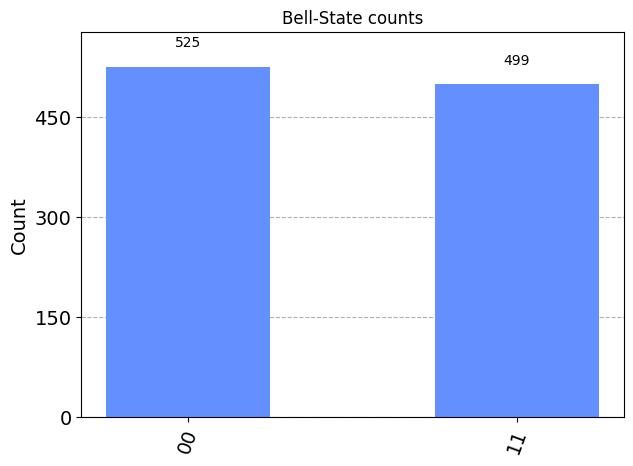

In [9]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator_statevector_gpu')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [17]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '11', '11', '11', '11', '11', '11', '11', '11', '11']


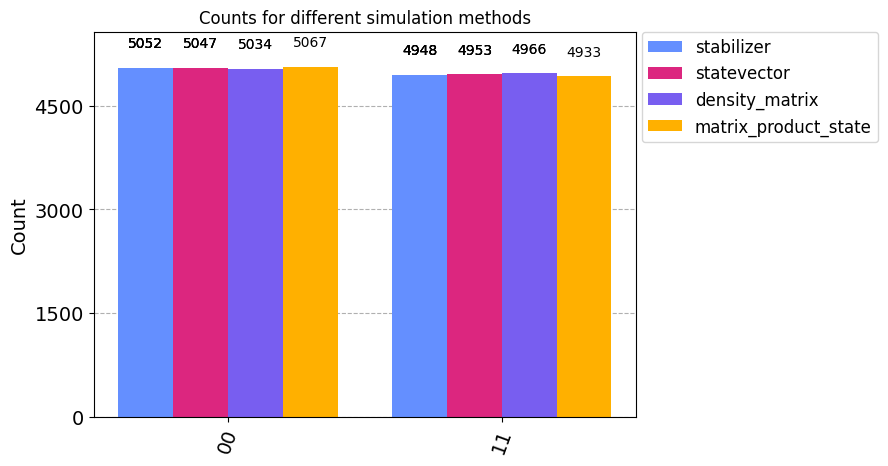

In [10]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector_gpu')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix_gpu')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

simulator_gpu = Aer.get_backend('aer_simulator')
simulator_gpu.set_options(device='GPU')
r = simulator_gpu.run(circ, shots=shots)
counts = r.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density,counts],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

In [10]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

In [11]:
pip list


/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Package                  Version
------------------------ -------------
asttokens                2.4.1
blinker                  1.4
comm                     0.2.1
contourpy                1.2.0
cryptography             3.4.8
cuquantum-cu12           23.10.0
custatevec-cu12          1.5.0
cutensor-cu12            1.7.0
cutensornet-cu12         2.3.0
cycler                   0.12.1
dbus-python              1.2.18
debugpy                  1.8.0
decorator                5.1.1
dill                     0.3.8
distro                   1.7.0
distro-info              1.1+ubuntu0.2
docplex                  2.25.236
exceptiongroup           1.2.0
executing                2.0.1
fonttools                4.50.0
httplib2                 0.20.2
importlib-metadata       4.6.4
ipykernel                6.29.0
ipython                  8.20.0
jedi                     0.19.1
jeepney                  0.7.1
jupyter_client           8.6.0